# seaborn

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# filter out warnings
import warnings
warnings.filterwarnings('ignore')
# show help()

In [2]:
# load data
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")
flights = sns.load_dataset("flights")
titanic = sns.load_dataset("titanic")

In [19]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### distplot

In [18]:
# fig, axs = plt.subplots(2, 2, figsize=(8, 6))

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

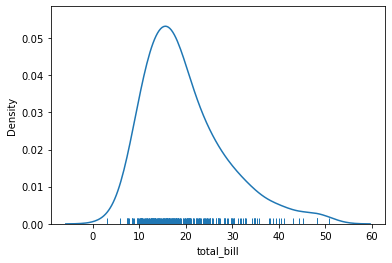

In [14]:
sns.distplot(
    tips["total_bill"],
    hist=False,
    rug=True,
)

In [16]:
# help(sns.distplot)

### joinplot

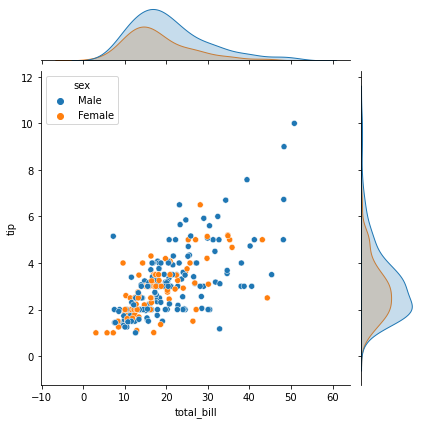

In [20]:
sns.jointplot(
    data=tips,
    x="total_bill",
    y="tip",
    kind="scatter",
    hue='sex'
)

### pairplot

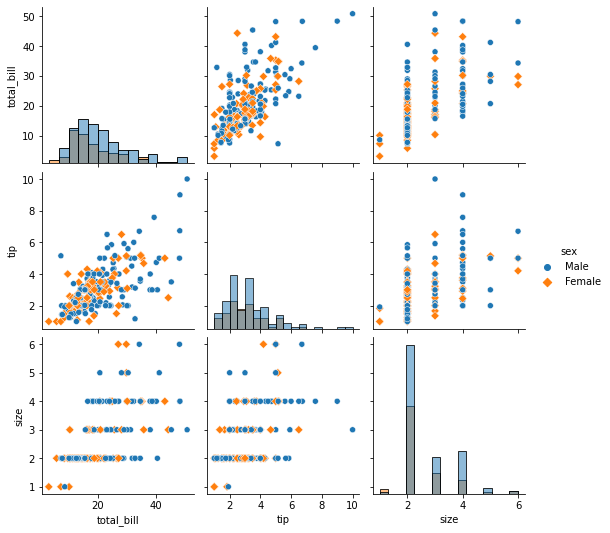

In [33]:
sns.pairplot(
    tips,
    hue="sex",
    diag_kind="hist",
    markers=["o", "D"],
)

In [25]:
print(iris.head())
iris['species'].unique()

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


array(['setosa', 'versicolor', 'virginica'], dtype=object)

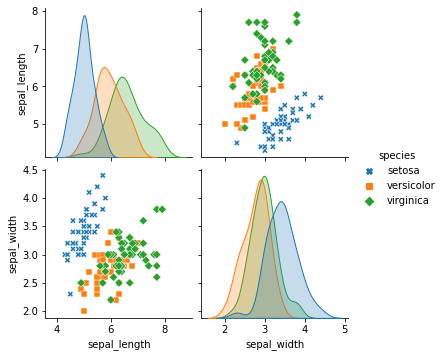

In [29]:
sns.pairplot(
    iris,
    hue='species',
    vars=['sepal_length', 'sepal_width'],
    # palette='husl',
    markers=['X', 's', 'D']
)

### regplot

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

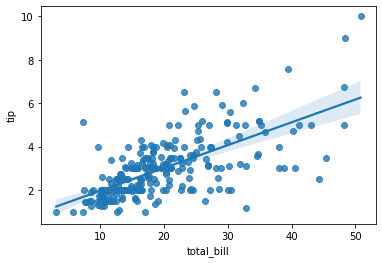

In [34]:
sns.regplot(
    data=tips,
    x="total_bill",
    y="tip",
    marker="o",
    # color="black",
)

## Categorical variables

### barplot

In [35]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


errcolor : matplotlib color
        Color for the lines that represent the confidence interval.
    errwidth : float, optional
        Thickness of error bar lines (and caps). 

<AxesSubplot:xlabel='day', ylabel='total_bill'>

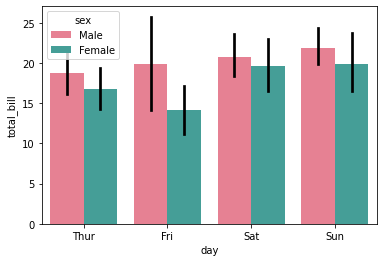

In [44]:
# Create a barplot showing the average total bill by day
sns.barplot(
    data=tips,
    x="day",
    y="total_bill",
    # hue='smoker',
    hue='sex',
    palette='husl',
    errcolor='black',
)

In [46]:
from library import random_student

In [48]:
random_student()

'Rocio Macari'

### countplot

<AxesSubplot:xlabel='day', ylabel='count'>

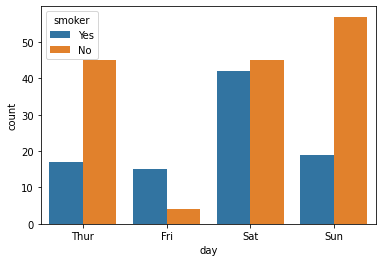

In [50]:
sns.countplot(
    data=tips,
    x="day",
    hue='smoker',
)

### violinplot

<AxesSubplot:xlabel='total_bill'>

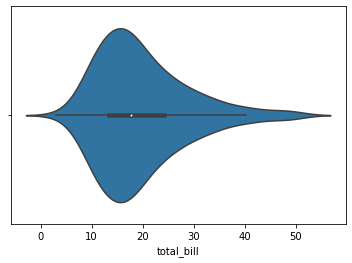

In [51]:
sns.violinplot(
    data=tips,
    x="total_bill",
)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

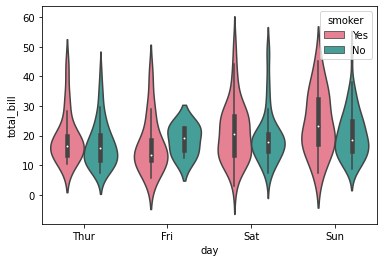

In [59]:
sns.violinplot(
    data=tips,
    x="day",
    y="total_bill",
    # hue='sex',
    hue='smoker',
    # split=True,
    palette='husl',
    # inner='quartile',
    inner='box',
    scale='width',
)

In [56]:
help(sns.violinplot)

Help on function violinplot in module seaborn.categorical:

violinplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, bw='scott', cut=2, scale='area', scale_hue=True, gridsize=100, width=0.8, inner='box', split=False, dodge=True, orient=None, linewidth=None, color=None, palette=None, saturation=0.75, ax=None, **kwargs)
    Draw a combination of boxplot and kernel density estimate.
    
    A violin plot plays a similar role as a box and whisker plot. It shows the
    distribution of quantitative data across several levels of one (or more)
    categorical variables such that those distributions can be compared. Unlike
    a box plot, in which all of the plot components correspond to actual
    datapoints, the violin plot features a kernel density estimation of the
    underlying distribution.
    
    This can be an effective and attractive way to show multiple distributions
    of data at once, but keep in mind that the estimation procedure is
    influenced by the

### Matrix plots


<AxesSubplot:xlabel='year', ylabel='month'>

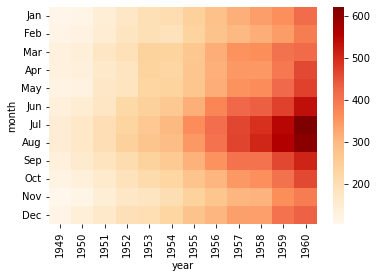

In [64]:
# Pivot the dataset to make it suitable for heatmap
flights_pivot = flights.pivot(
    'month',
    'year',
    'passengers'
)

# Create the heatmap
sns.heatmap(flights_pivot, cmap='OrRd')

## Bonus

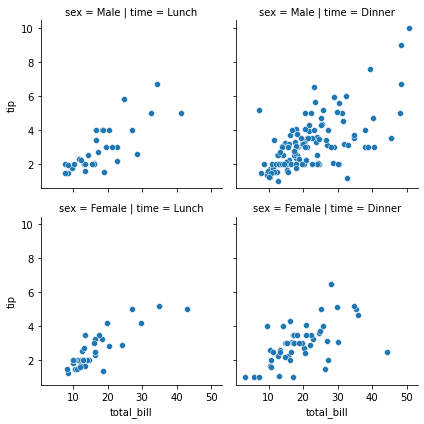

In [65]:
# Create the FacetGrid
g = sns.FacetGrid(tips, col='time', row='sex')

# Map a scatter plot to the FacetGrid
g.map(sns.scatterplot, 'total_bill', 'tip')

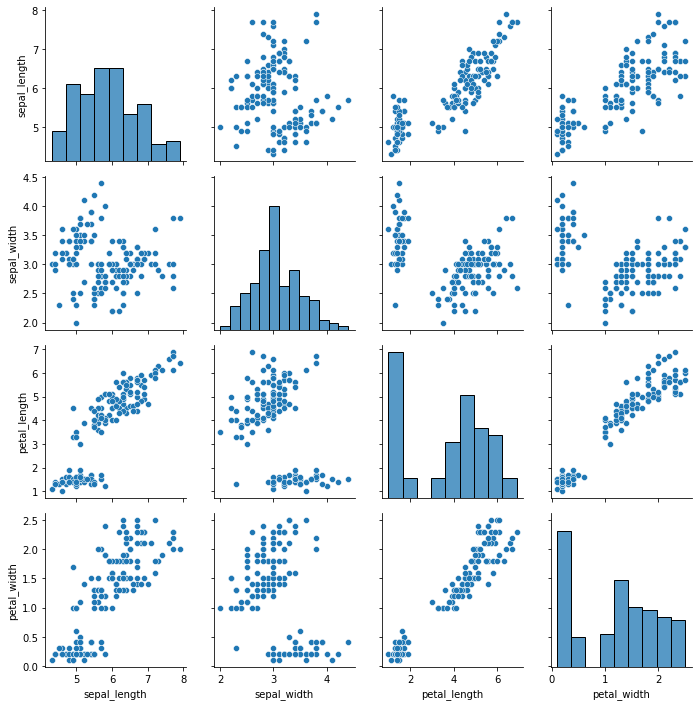

In [66]:
# Create the PairGrid
g = sns.PairGrid(iris)

# Map a scatter plot to the PairGrid
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)